2. 문장 분절하기
    - 개행(`\n`)이 많기 때문에 한 문장이 잘못 끊길 수 있음. 주의할 것.
3. 토큰(단어) 분절하기 
4. 불필요한 토큰 제거하기 
    
    *(정규표현식 사용하지 않습니다.)*
    
    - 문장부호
        1. 라이브러리에 포함되지 않은 문장부호도 뺄 것: 예를 들면, `...`
    - 개행, 공백, ...
    - 책의 페이지, 저자
        
        예: `\nPage | 4 Harry Potter and the Philosophers Stone - J.K. Rowling`
        
    - 기타
        1. apostrophe s: `don’t` → do, not
        2. hyphen: `good-for-nothing` → good, for, nothing
    - 불용어 제거하기
        
        ```python
        stopwords = nltk.corpus.stopwords.words('english')
        ```
        
5. 정제 후 남은 토큰 uncasing한 뒤, frequency distribution 만들고, top 50로 그림 그리기
6. 총 토큰 개수 출력

총 토큰 개수: 40819


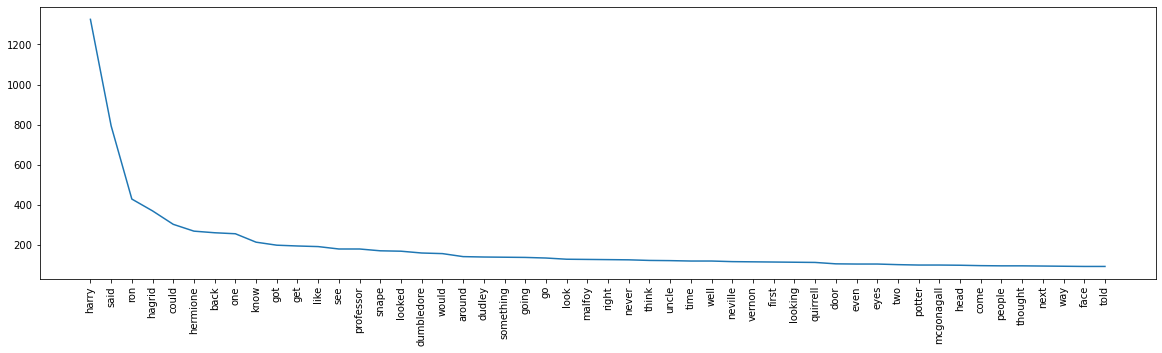

In [9]:
# 파일 불러오기
import os
import string
import nltk
import matplotlib.pyplot as plt
# file path 설정
file_name = 'HarryPotter.txt'
path = r'C:\Users\perod\고급파이썬프로그래밍'
file = os.path.join(path, file_name)
stopwords = nltk.corpus.stopwords.words('english') #불용어 설정

with open(file,  encoding='UTF-8') as f:
    text = f.readlines()
    
# 문장 분절하기---------------------------------------    
for line in text:
    if line.startswith('Page |'): #페이지부터 저자이름까지
        text.remove(line) #-지우기

text = ''.join(text)
text = text.replace('Mr.', 'Mr').replace('Mrs.', 'Mrs').replace('!', '.').replace('?', '.').replace('...', '.').replace('. . .', '.').replace('\n', '').replace('“', '').replace('”', '').replace('-', ' ').replace('—', '')
# 온점으로 문장 분절할 때 잘못 분절되는 부분 replace 및 온점이 아닌 다른 마침표들 replace

sent_list = [sent.strip() for sent in text.split('.')] #온점 기준 문장 분절


# 단어 분절하기---------------------------------------    
#word_list = ' '.join(sent_list).split() #문장을 join으로 통째로 하나의 문자열로 만들었다가 띄어쓰기를 기준으로 다시 단어 분절
word_in_sent = [word.split() for word in sent_list] # 큰 리스트 안에 각 문장 별로 리스트화해서 단어 분절 넣기

word_replace = [[word.replace("can’t", "can not").replace("won’t", 'will not').replace("n’t", ' not')
                 .replace("in’", 'ing').replace('yeh', 'you').replace('yer','your').replace("C’mon", 'come on').replace("C’mere", 'come here')
                 .replace("G ’night", 'Good night').replace("o’clock", "o'clock").replace("o’", 'of').replace("myst’ry", 'mystery').replace("’", "_'")
               for word in sent] # ’가 단어 중간에 들어간 단어들은 밑에서 분절할 때 잘못 분절되기 때문에 미리 replace
                for sent in word_in_sent] #예외 처리

word_in_sent = [' '.join(sent).split() for sent in word_replace] #예외처리 한 문장별 단어 분절 리스트


# 예외 처리하기---------------------------------------    

punct = list(string.punctuation) #우선 punctuation을 리스트로 불러와서
other_punct = set([word[0] for sent in sent_list for word in sent 
                if (not word[0].isalnum()) and (word not in punct)]) #punct안에 포함되지 않은 다른 특수문자를 찾아서
punct.extend(list(other_punct)) #punct에 추가한 후

punct = tuple(punct) #endswith/startswith으로 판별하기 위해 튜플화



refined_word = []
for sent in word_in_sent:
    word_fixed = []
    for word in sent:
        if word not in punct and word:            
            if word == "an_'":
                word = 'and'
            if word == "jus_'":
                word = 'just'
            if word == "abou_'":
                word = 'about'
            if word == "jus_'":
                word = 'just'
            if word == "Las_'":
                word = 'Last'  #----여기까지 작은따옴표 예외처리-----
            if word.startswith(punct):
                word = word[1:] #단어 앞에 붙은 특수문자 제거
            if "_'" in word: 
                words = word.split("_'") #split으로 인해 2차원 리스트가 되기 때문에 별개의 변수로 할당                
            else:
                if word.endswith(punct):
                    word = word[:-1] #단어 뒤에 붙은 특수문자 제거
                words = [word] #2차원리스트
    
            word_fixed.extend(words) #2차원리스트가 되지 않도록 extend
        
        else:
            word_fixed.append(word)       
        
    if word_fixed:
        refined_word.append(word_fixed) # 예외처리 한 단어 리스트 새로운 리스트로 이동
        
refined_word = [[word for word in sent
                 if not word.endswith(punct) #'s,' 제거
                 if not word.lower() in stopwords and word] # 불용어 제거
                for sent in refined_word ]

refined_word = [w for w in refined_word if w] # 빈 문장 제거, uncasing 전 최종 토큰


# requency distribution 만들고, top 50로 그림 그리기 ----------------------------------

uncased = [word.lower() for sent in refined_word for word in sent] #소문자화 후 1차원리스트로
fdist = nltk.FreqDist(uncased)
most_used = {key:value for key, value in fdist.most_common(50)} # TOP50
plt.figure(figsize=(20,5)) # 그래프 사이즈
plt.xticks(rotation=90) #단어 표시 각도
plt.plot(most_used.keys(), most_used.values())  #그래프

# 총 토큰 개수 출력---------------------------------
print(f'총 토큰 개수: {len(uncased)}')